In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
from pandas.plotting import register_matplotlib_converters
import geopandas as gpd
import geoplot
register_matplotlib_converters()
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

In [12]:
# utility function to load shapefile
def get_country_shapefile(path, country, admin_level=0):
    """
    get shapefile of given country
    """
    country_shapefile = {
            'Uganda': 'uga_admbnda_adm'+str(admin_level)+'_UBOS_v2.shp'
            }
    return str(path+'shapefiles/'+country+'/'+country_shapefile[country])

In [10]:
data = pd.read_csv('../datasets/Droughts_satelite_and_events_Znormed.csv')

feature_cols = ['NDVI', 'EVI', 'precipitation_per_hour_v1', 'precipitation_per_hour_v2',
       'surface_temperature_daytime', 'surface_temperature_nighttime',
       'evapotranspiration', 'rainfall', 'SoilMoisture00_10cm',
       'SoilMoisture10_40cm', 'SoilMoisture40_100cm', 'SoilMoisture100_200cm',
       'SoilTemperature00_10cm', 'SoilTemperature10_40cm',
       'SoilTemperature40_100cm', 'SoilTemperature100_200cm',
       'air_temperature', 'wind_speed', 'SPEI_1month', 'SPEI_2month',
       'SPEI_3month', 'SPEI_4month', 'SPEI_5month', 'SPEI_6month',
       'SPEI_7month', 'SPEI_8month', 'SPEI_9month', 'SPEI_10month',
       'SPEI_11month', 'SPEI_12month']

target_cols = ['drought_reported',
       'drought_news_article', 'drought_desinventar']

id_cols = ['date', 'day', 'month',
       'year', 'Country', 'District']

data = data[id_cols+feature_cols+target_cols]

data['date'] = pd.to_datetime(data['date'],infer_datetime_format=True)

data.head()

,date,day,month,year,Country,District,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar
0,2000-03-01,1,3,2000,Uganda,ABIM,-1.874641,-1.570809,-1.217134,-1.210825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,2000-04-01,1,4,2000,Uganda,ABIM,-1.206775,-1.143460,0.554526,0.337322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2,2000-05-01,1,5,2000,Uganda,ABIM,0.544968,0.484206,0.726150,0.654021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,2000-06-01,1,6,2000,Uganda,ABIM,0.853214,0.948032,0.974735,0.485003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,2000-07-01,1,7,2000,Uganda,ABIM,1.180418,1.321811,0.368088,-0.002803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [38]:
country = 'Uganda'

UG_data = data[data.Country==country]
coordinates = pd.read_csv('../datasets/UG_Coordinates.csv')
UG_data = pd.merge(UG_data,coordinates,on='District',how='inner')

geo_UG_data = gpd.GeoDataFrame(
    UG_data, geometry=gpd.points_from_xy(UG_data.lon, UG_data.lat))

geo_UG_data.head()

,date,day,month,year,Country,District,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar,lon,lat,geometry
0,2000-03-01,1,3,2000,Uganda,ABIM,-1.874641,-1.570809,-1.217134,-1.210825,...,NaN,NaN,NaN,NaN,False,False,False,33.725445,2.749191,POINT (33.72544 2.74919)
1,2000-04-01,1,4,2000,Uganda,ABIM,-1.206775,-1.143460,0.554526,0.337322,...,NaN,NaN,NaN,NaN,False,False,False,33.725445,2.749191,POINT (33.72544 2.74919)
2,2000-05-01,1,5,2000,Uganda,ABIM,0.544968,0.484206,0.726150,0.654021,...,NaN,NaN,NaN,NaN,False,False,False,33.725445,2.749191,POINT (33.72544 2.74919)
3,2000-06-01,1,6,2000,Uganda,ABIM,0.853214,0.948032,0.974735,0.485003,...,NaN,NaN,NaN,NaN,False,False,False,33.725445,2.749191,POINT (33.72544 2.74919)
4,2000-07-01,1,7,2000,Uganda,ABIM,1.180418,1.321811,0.368088,-0.002803,...,NaN,NaN,NaN,NaN,False,False,False,33.725445,2.749191,POINT (33.72544 2.74919)


Text(0, 0.5, 'number of droughts')

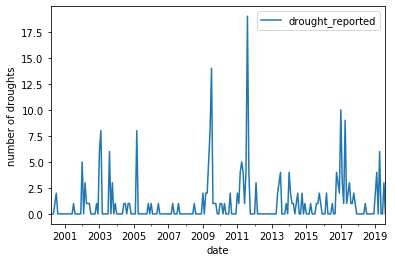

In [55]:
geo_UG_data[['date','drought_reported']].groupby('date').sum().plot()
plt.ylabel('number of droughts')

In [62]:
d=geo_UG_data[['date','drought_reported']].groupby('date').sum()
d[d.drought_reported==19]

,drought_reported
date,
2011-08-01,19.0


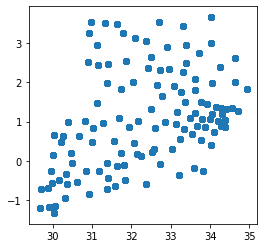

In [39]:
geo_UG_data.plot()

In [30]:

path = '../../'
gdf_country = gpd.read_file(get_country_shapefile(path,country, admin_level=1), crs='')
gdf_country.rename(columns={'ADM1_EN':'District'},inplace=True)

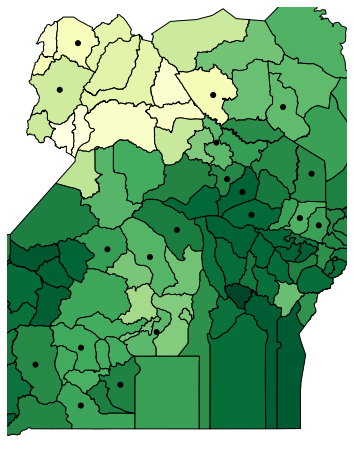

In [119]:
df = geo_UG_data.copy()
selected_date = datetime(2011,8,1)
value_colname = 'SPEI_1month'
target_colname = 'drought_reported'

temp = df[df.date==selected_date]
temp = gdf_country.merge(temp[['date','District',value_colname, target_colname]],on='District')

#ax=geoplot.choropleth(
    #temp, hue=temp['EVI'],
    #cmap='YlGn', figsize=(16, 8),ax=plt.gca()
#)
ax=geoplot.choropleth(
    temp, hue=temp[value_colname],
    cmap='YlGn', figsize=(16, 8)
)
#ax2=geoplot.polyplot(temp,ax=ax)
geoplot.pointplot(temp2,ax=ax, color="black", zorder=2)

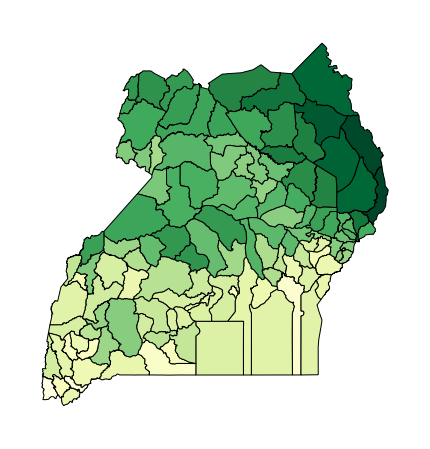

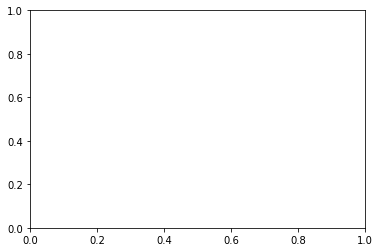

In [99]:
plt.gca()

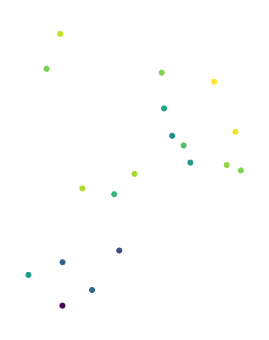

In [109]:
ax=geoplot.pointplot(temp2,hue=temp2['EVI'])
#geoplot.choropleth(temp, hue=temp['EVI'], ax=ax)

In [108]:
temp2['EVI']

137      1.173631
1775     0.822362
5982     0.339620
8086     0.689293
9022    -0.145807
9958     0.602852
10192    0.940281
13000    0.842186
13702   -0.527951
14872    0.387244
15808    0.007582
18615    1.129098
19550    0.406191
20720    0.893282
21188    0.967555
22358    0.457595
23995    0.037138
26100    1.015305
28439    0.843916
Name: EVI, dtype: float64

In [75]:
geoplot.pyplot(temp2)

AttributeError: module 'geoplot' has no attribute 'pyplot'